# **IMPORT LIBRARIES**

In [14]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **IMPORT DATA, TEST/TRAIN SPLIT, SCALE**

In [15]:
features = pd.read_csv("../data/paris_lille/geometric_features.csv")

X = features.drop(['class'], axis=1)
y = features[['class']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y)

# **BASELINE GNB**

In [16]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.333     0.200     0.250        10
           Bench      0.000     0.000     0.000         2
    Bicycle Rack      0.500     0.250     0.333         4
Bicycle Terminal      0.000     0.000     0.000         9
         Bollard      0.125     0.016     0.028        64
        Building      0.800     0.727     0.762        11
           Chair      1.000     1.000     1.000         3
Distribution Box      0.333     0.500     0.400         6
      Floor Lamp      0.714     0.208     0.323        24
          Island      0.000     0.000     0.000         1
Lighting Console      0.211     0.676     0.322        34
        Low Wall      0.800     0.267     0.400        15
      Mobile Car      0.067     0.143     0.091         7
Mobile Motorbike      0.000     0.000     0.000         1
  Mobile Scooter      0.000     0.000     0.000         1
      Mobile Van      1.000     1.000     1.000         1
         Natu

# **CONFUSION MATRIX**

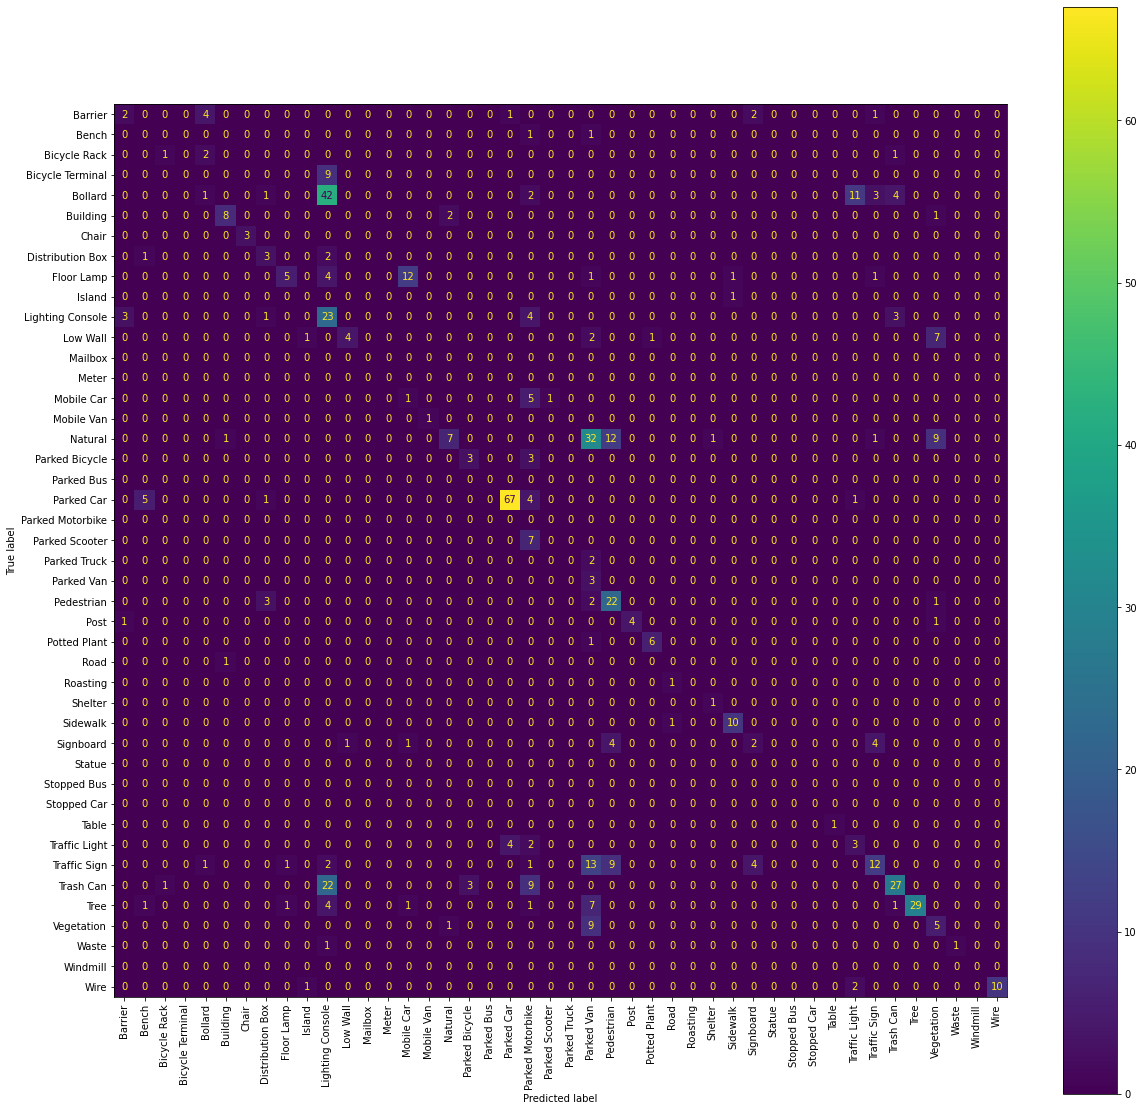

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=gnb_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=gnb_model.classes_)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cmd.plot(ax=ax, xticks_rotation='vertical');

plt.savefig('confusionmatrix_naivebayes.png', dpi=600)

# **FEATURES IMPORTANCE**

In [19]:
results = permutation_importance(gnb_model, X_test, y_test, scoring='f1_micro')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score %.5f' % (i,v))

Feature: 0, Score 0.01934
Feature: 1, Score 0.01770
Feature: 2, Score 0.06164
Feature: 3, Score 0.02393
Feature: 4, Score 0.04984
Feature: 5, Score 0.07377
Feature: 6, Score 0.01934
Feature: 7, Score 0.14230
Feature: 8, Score 0.26197


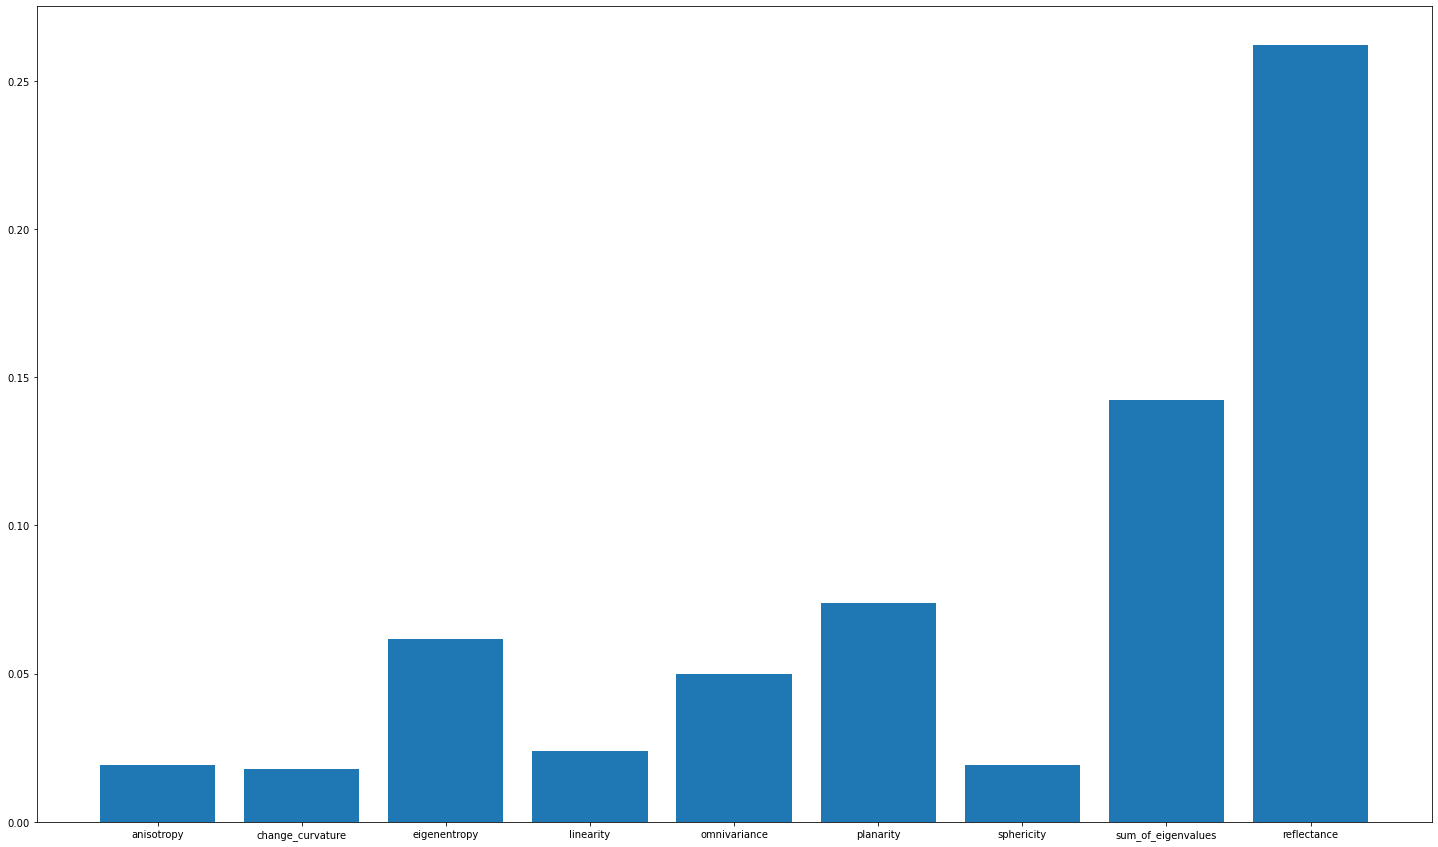

In [21]:
plt.figure(figsize=(25,15))
plt.bar(range(len(results.importances_mean)), results.importances_mean)
plt.xticks(range(len(results.importances_mean)), X.columns)
plt.savefig('featureimportance_naivebayes.png', dpi=600)
plt.show()